In [115]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from freqtrade.data.history import load_pair_history
from pathlib import Path
import mplfinance as mpf
import talib.abstract as ta
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
candles = load_pair_history(datadir=Path('data', 'binance'),
                            timeframe='1h',
                            pair='BTC/USDT',
                            data_format = "json",
                            )
candles.index=candles.date
candles.drop('date',inplace=True,axis=1)
candles.head()

,open,high,low,close,volume
date,,,,,
2020-12-01 00:00:00+00:00,19695.87,19720.00,19479.80,19565.47,4570.361518
2020-12-01 01:00:00+00:00,19565.47,19639.99,19433.15,19605.75,2702.459235
2020-12-01 02:00:00+00:00,19605.75,19704.93,19548.57,19680.95,2408.229978
2020-12-01 03:00:00+00:00,19680.96,19682.77,19340.00,19419.74,2889.848604
2020-12-01 04:00:00+00:00,19419.73,19527.02,19344.92,19354.31,3400.857941


In [22]:
candles.loc[:candles.index[5],:] > candles.loc[:candles.index[5],:].shift(1)

,open,high,low,close,volume
date,,,,,
2020-12-01 00:00:00+00:00,False,False,False,False,False
2020-12-01 01:00:00+00:00,False,False,False,True,False
2020-12-01 02:00:00+00:00,True,True,True,True,False
2020-12-01 03:00:00+00:00,True,False,False,False,True
2020-12-01 04:00:00+00:00,False,False,True,False,True
2020-12-01 05:00:00+00:00,False,False,False,True,False


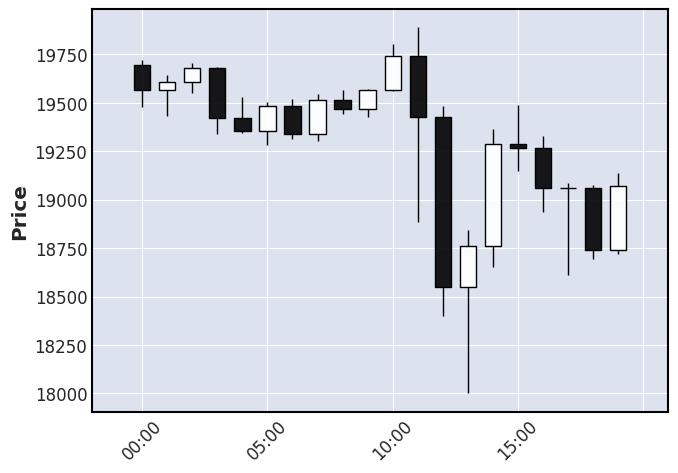

In [17]:
mpf.plot(candles.loc[candles.index[:20]],type='candle')

In [6]:
aave_df=pd.read_json('tototest/data/binance/AAVE_USDT-1h.json')

In [20]:
aave_df[0]=aave_df[0].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))

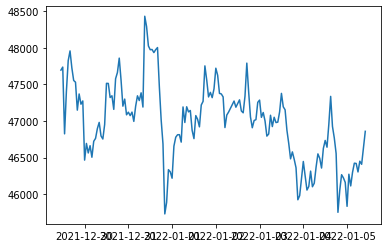

In [6]:
plt.plot(candles.index[-168:],candles.loc[candles.index[-168:],'open'])

In [10]:
i in list(np.linspace(0,len(price),24))

NameError: name 'i' is not defined

In [10]:
pairs=[str(fname.split(sep='_')[0]+'/'+fname.split(sep='_')[1])[:-8] for fname in os.listdir('data/binance')]
print(pairs[:5])

['HARD/USDT', 'TKO/USDT', 'ETH/USDT', 'NMR/USDT', 'MATIC/USDT']


In [122]:
#do for each pair
data=pd.DataFrame()
print(pairs[:10])
for pair in pairs:
    candles = load_pair_history(datadir=Path('data', 'binance'),
                                timeframe='1h',
                                pair=pair,
                                data_format = "json",
                                )
    candles.index=candles.date
    candles.drop('date',inplace=True,axis=1)
    price=list(candles['close'])
    chunks=[(price[i:i+336],price[i+360]) for i in list(np.arange(0,len(price)-360,24))]
    temp=pd.DataFrame(chunks)
    data=pd.concat([data,temp])
    #y_temp=[x[1] for x in chunks]
    #plt.plot(range(len(X_temp.loc[0])),X_temp.loc[43])
    #plt.scatter(len(X_temp)+24,chunks[43][1])
data.columns=['X','y']
X=np.array(data['X'].tolist())
y_reg=data['y'].tolist()
y=np.array([int(y_reg[i] > X[i,-1]+0.005*X[i,-1]) for i in range(len(y_reg))])
print(X.shape,y.shape)
np.savetxt('X.csv',X,delimiter=',')
np.savetxt('y.csv',X,delimiter=',')

unique, counts = np.unique(y, return_counts=True)
print(f'y counts {dict(zip(unique, counts))} fraction of +: {counts[1]/np.sum(counts)}')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

['HARD/USDT', 'TKO/USDT', 'ETH/USDT', 'NMR/USDT', 'MATIC/USDT', 'ZIL/USDT', 'XMR/USDT', 'EGLD/USDT', 'STMX/USDT', 'ANKR/USDT']
(46052, 336) (46052,)
y counts {0: 24391, 1: 21661} fraction of +: 0.4703595935029966


In [114]:
clf=MLPClassifier(random_state=42)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(f'acc= {round(accuracy_score(y_test,pred),4)}')

acc= 0.5114
